In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def exponential_smoothing(d,extra_periods=1,alpha=0.25):
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)
    f = np.full(n + extra_periods, np.nan)
    f[1] = d[0]
    for t in range(2,n):
        f[t] = alpha*d[t-1] + (1-alpha)*f[t-1]
    
    f[t+1:]=f[t]
    df = pd.DataFrame.from_dict({'demand': d, 'forecast': f, 'Error': d-f })
    return df

In [3]:
df = pd.read_csv('trimmed_data.csv')
d = np.array(df['Quantity'])


In [4]:
df2 = exponential_smoothing(d,3)

In [5]:
def kpi(df2):
    e = df2['Error']
    d = df2['demand']
    MAE = (e.abs().mean())/(d.mean())
    MAPE = (e.abs()/d.abs()).mean()
    RMSE = np.sqrt((e**2).mean())/(d.mean())
    return { 'MAE': MAE, 'MAPE': MAPE , 'RMSE': RMSE}
    


<Axes: title={'center': 'Simple Exponential Model'}, xlabel='Period', ylabel='Volume'>

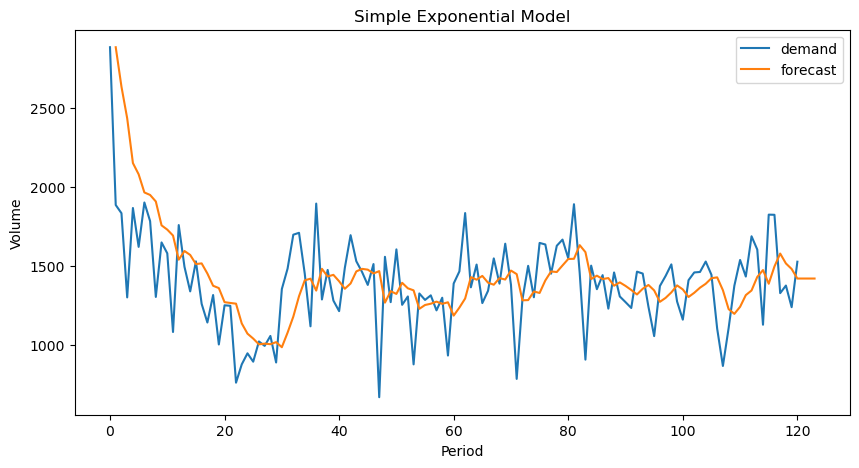

In [6]:
df2[['demand','forecast']].plot(figsize=(10,5),xlabel = 'Period', ylabel= 'Volume', title= 'Simple Exponential Model')

In [7]:
def kpi2(df):
    dem_ave = df.loc[df['Error'].notnull(),'demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs,bias_rel))
    MAPE = (df['Error'].abs()/df['demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs,MAE_rel)) 
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs,RMSE_rel)) 
    

In [8]:
kpi(df2)

{'MAE': 0.15713641014374022,
 'MAPE': 0.17174736960631995,
 'RMSE': 0.21542821769956716}

In [9]:
kpi2(df2)

Bias: -47.93, -3.48%
MAPE: 17.17%
MAE: 218.40, 15.86%
RMSE: 299.42, 21.74%
